# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
!pip install citipy

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
city_name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cloudiness=[]
temp=[]
weather_key = "ENTER KEY"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_key + "&q="
query_url
    

'http://api.openweathermap.org/data/2.5/weather?appid=9ca84a54fb6651a751db708cf86ceea3&q='

In [52]:
index = 0
for city in cities: 
    print(f"Processing Record {index} {city}")
    
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("Skipping. No Value")
        pass
    index += 1

Processing Record 0 port-cartier
Processing Record 1 karratha
Processing Record 2 puerto ayora
Processing Record 3 ust-kamchatsk
Skipping. No Value
Processing Record 4 zhezkazgan
Processing Record 5 barrow
Processing Record 6 nortelandia
Processing Record 7 bredasdorp
Processing Record 8 hithadhoo
Processing Record 9 northallerton
Processing Record 10 meulaboh
Processing Record 11 yellowknife
Processing Record 12 airai
Processing Record 13 bathsheba
Processing Record 14 tsihombe
Skipping. No Value
Processing Record 15 poykovskiy
Processing Record 16 pisco
Processing Record 17 qaanaaq
Processing Record 18 alofi
Processing Record 19 mataura
Processing Record 20 fairbanks
Processing Record 21 san jeronimo
Processing Record 22 punta arenas
Processing Record 23 mys shmidta
Skipping. No Value
Processing Record 24 mar del plata
Processing Record 25 port elizabeth
Processing Record 26 taolanaro
Skipping. No Value
Processing Record 27 ayan
Processing Record 28 medea
Processing Record 29 palabuh

Processing Record 249 naze
Processing Record 250 kununurra
Processing Record 251 etchojoa
Processing Record 252 milkovo
Processing Record 253 mehamn
Processing Record 254 gravdal
Processing Record 255 narsaq
Processing Record 256 klaksvik
Processing Record 257 kolokani
Processing Record 258 emerald
Processing Record 259 ambodifototra
Skipping. No Value
Processing Record 260 waingapu
Processing Record 261 tapaua
Skipping. No Value
Processing Record 262 najran
Processing Record 263 meadow lake
Processing Record 264 amderma
Skipping. No Value
Processing Record 265 hamilton
Processing Record 266 kysyl-syr
Processing Record 267 moussoro
Processing Record 268 yerbogachen
Processing Record 269 samusu
Skipping. No Value
Processing Record 270 aurad
Processing Record 271 east bethel
Processing Record 272 mackay
Processing Record 273 cidreira
Processing Record 274 saint-avertin
Processing Record 275 khatanga
Processing Record 276 mut
Processing Record 277 christchurch
Processing Record 278 kuryk


Processing Record 498 tutin
Processing Record 499 buala
Processing Record 500 jalu
Processing Record 501 kananga
Processing Record 502 pringsewu
Processing Record 503 valdez
Processing Record 504 severo-kurilsk
Processing Record 505 wrzesnia
Processing Record 506 pare
Processing Record 507 igarape-acu
Skipping. No Value
Processing Record 508 shirokiy
Processing Record 509 impfondo
Processing Record 510 amapa
Processing Record 511 mugur-aksy
Processing Record 512 nantucket
Processing Record 513 cap malheureux
Processing Record 514 kavieng
Processing Record 515 san policarpo
Processing Record 516 esperance
Processing Record 517 dzhankoy
Processing Record 518 collie
Processing Record 519 katangli
Processing Record 520 rio grande
Processing Record 521 westpunt
Skipping. No Value
Processing Record 522 wanning
Processing Record 523 bandarbeyla
Processing Record 524 svetlaya
Processing Record 525 praia da vitoria
Processing Record 526 bengkulu
Processing Record 527 lethem
Processing Record 52

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
weather_dictionary = {
    "City":city_name,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed,
}

In [54]:
weatherdf = pd.DataFrame(weather_dictionary)
weatherdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port-Cartier,75,CA,1581014759,56,50.03,-66.87,265.37,2.60
1,Karratha,100,AU,1581014759,75,-20.74,116.85,302.78,8.91
2,Puerto Ayora,90,EC,1581014475,66,-0.74,-90.35,302.15,5.70
3,Zhezkazgan,90,KZ,1581014760,92,47.80,67.71,268.15,4.00
4,Barrow,1,US,1581014760,97,71.29,-156.79,238.15,3.10
...,...,...,...,...,...,...,...,...,...
542,Port Keats,93,AU,1581014868,78,-14.25,129.55,301.26,4.87
543,Cayambe,20,EC,1581014868,20,0.05,-78.13,298.15,2.60
544,Bayir,75,TR,1581014869,93,37.27,28.22,281.15,2.60
545,Pochutla,40,MX,1581014869,62,15.74,-96.47,303.15,7.70


In [55]:
weatherdf.to_csv("weatherdata.csv")

In [56]:
fahrenheitchange = (weatherdf["Max Temp"] * (9/5) - 459.67)
fahrenheitchange

0      17.996
1      85.334
2      84.200
3      23.000
4     -31.000
        ...  
542    82.598
543    77.000
544    46.400
545    86.000
546    74.462
Name: Max Temp, Length: 547, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

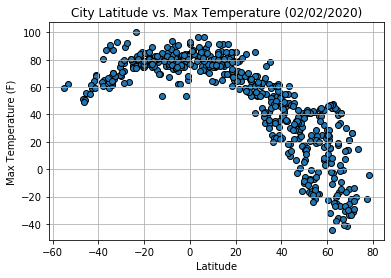

In [57]:
plt.scatter(weatherdf["Lat"], fahrenheitchange,edgecolors="black")
plt.title("City Latitude vs. Max Temperature (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("LatvsTemp.png")

#### Latitude vs. Humidity Plot

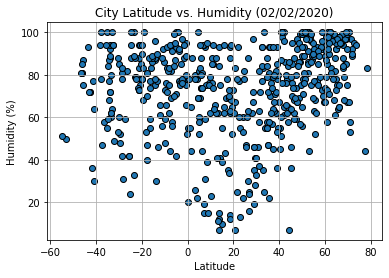

In [58]:
plt.scatter(weatherdf["Lat"], weatherdf["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Totallatvsmaxtemp.png")



#### Latitude vs. Cloudiness Plot

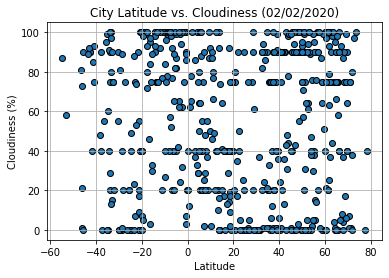

In [59]:
plt.scatter(weatherdf["Lat"], weatherdf["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Latvstotalcloud.png")

#### Latitude vs. Wind Speed Plot

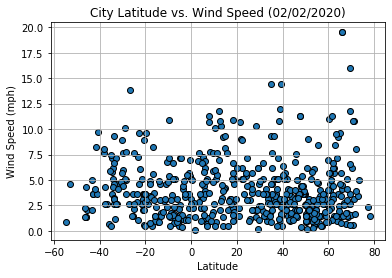

In [60]:
plt.scatter(weatherdf["Lat"], weatherdf["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Latvstotalwindspeed.png")

## Linear Regression

In [61]:
# OPTIONAL: Create a function to create Linear Regression plots


In [62]:
# Create Northern and Southern Hemisphere DataFrames


In [63]:
import scipy.stats as st


In [64]:
northhemis = weatherdf.loc[weatherdf["Lat"] >= 0]
northhemis


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port-Cartier,75,CA,1581014759,56,50.03,-66.87,265.37,2.60
3,Zhezkazgan,90,KZ,1581014760,92,47.80,67.71,268.15,4.00
4,Barrow,1,US,1581014760,97,71.29,-156.79,238.15,3.10
8,Northallerton,2,GB,1581014761,89,54.34,-1.43,278.71,2.10
9,Meulaboh,100,ID,1581014761,78,4.14,96.13,300.83,3.47
...,...,...,...,...,...,...,...,...,...
538,Lithakia,20,GR,1581014864,80,37.72,20.83,283.15,2.60
540,Turan,40,VN,1581014692,94,16.07,108.22,294.15,0.50
543,Cayambe,20,EC,1581014868,20,0.05,-78.13,298.15,2.60
544,Bayir,75,TR,1581014869,93,37.27,28.22,281.15,2.60


In [65]:
southhemis = weatherdf.loc[weatherdf["Lat"] < 0]
southhemis

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Karratha,100,AU,1581014759,75,-20.74,116.85,302.78,8.91
2,Puerto Ayora,90,EC,1581014475,66,-0.74,-90.35,302.15,5.70
5,Nortelandia,100,BR,1581014760,87,-14.45,-56.80,299.00,0.86
6,Bredasdorp,99,ZA,1581014761,68,-34.53,20.04,292.15,7.20
7,Hithadhoo,3,MV,1581014598,78,-0.60,73.08,301.58,5.35
...,...,...,...,...,...,...,...,...,...
537,Vangaindrano,88,MG,1581014867,89,-23.35,47.60,296.42,1.10
539,Waipawa,85,NZ,1581014759,77,-41.41,175.52,288.15,8.20
541,Mitsamiouli,20,KM,1581014868,88,-11.38,43.28,299.15,3.10
542,Port Keats,93,AU,1581014868,78,-14.25,129.55,301.26,4.87


In [66]:
fahrenheitchangenorth = (northhemis["Max Temp"] * (9/5) - 459.67)
fahrenheitchangenorth

0      17.996
3      23.000
4     -31.000
8      42.008
9      81.824
        ...  
538    50.000
540    69.800
543    77.000
544    46.400
545    86.000
Name: Max Temp, Length: 377, dtype: float64

In [67]:
fahrenheitchangesouth = (southhemis["Max Temp"] * (9/5) - 459.67)
fahrenheitchangesouth

1      85.334
2      84.200
5      78.530
6      66.200
7      83.174
        ...  
537    73.886
539    59.000
541    78.800
542    82.598
546    74.462
Name: Max Temp, Length: 170, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8578516026687921


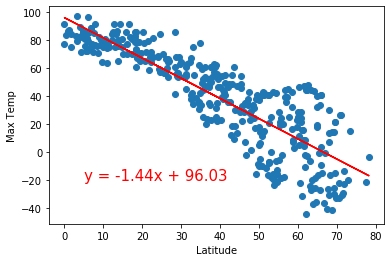

In [68]:
x_values = northhemis["Lat"]
y_values = fahrenheitchangenorth
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsnmaxtemp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5562972980665292


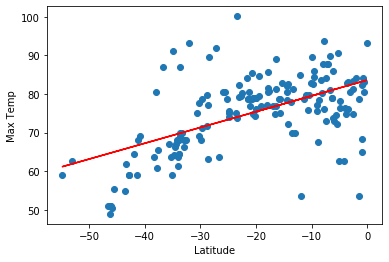

In [69]:
x_values = southhemis["Lat"]
y_values = fahrenheitchangesouth
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("latvssmaxtemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.42738136917051106


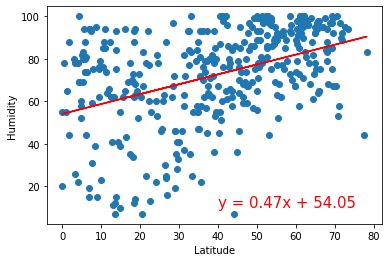

In [70]:
x_values = northhemis["Lat"]
y_values = northhemis["Humidity"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsnhumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1563226861488363


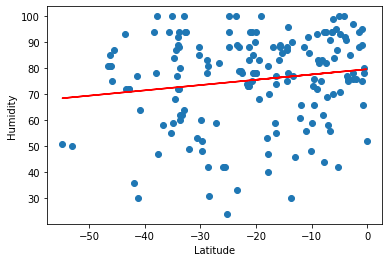

In [71]:
x_values = southhemis["Lat"]
y_values = southhemis["Humidity"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsshumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15500138238987973


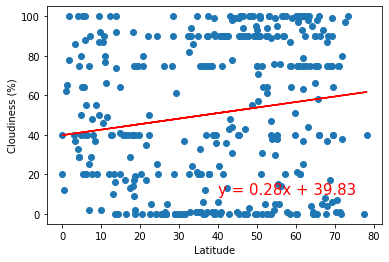

In [72]:
x_values = northhemis["Lat"]
y_values = northhemis["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsncloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16767327832062928


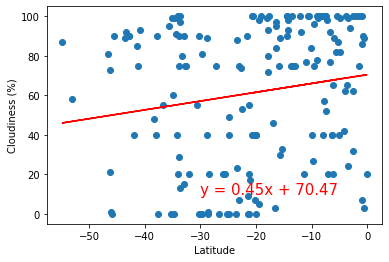

In [73]:
x_values = southhemis["Lat"]
y_values = southhemis["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsscloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.042014506384842096


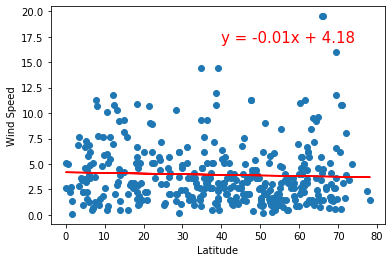

In [74]:
x_values = northhemis["Lat"]
y_values = northhemis["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsnwindspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1931516892529122


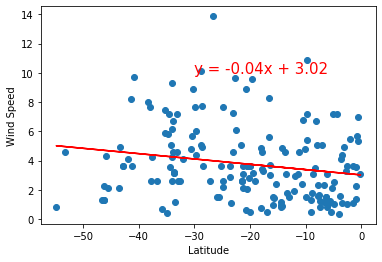

In [75]:
x_values = southhemis["Lat"]
y_values = southhemis["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Latvsswindspeed.png")